## 1、项目介绍

火力发电的基本原理是：燃料在燃烧时加热水生成蒸汽，蒸汽压力推动汽轮机旋转，然后汽轮机带动发电机旋转，产生电能。在这一系列的能量转化中，影响发电效率的核心是锅炉的燃烧效率，即燃料燃烧加热水产生高温高压蒸汽。锅炉的燃烧效率的影响因素很多，包括锅炉的可调参数，如燃烧给量，一二次风，引风，返料风，给水水量；以及锅炉的工况，比如锅炉床温、床压，炉膛温度、压力，过热器的温度等。

In [1]:
#导入数据探索包
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

import warnings
warnings.filterwarnings("ignore")


In [2]:
train_data_file="./data/zhengqi_train.txt"
test_data_file="./data/zhengqi_test.txt"

train_data=pd.read_csv(train_data_file,sep='\t')
test_data=pd.read_csv(test_data_file,sep='\t')

In [3]:
train_data.info()
test_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2888 entries, 0 to 2887
Data columns (total 39 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V0      2888 non-null   float64
 1   V1      2888 non-null   float64
 2   V2      2888 non-null   float64
 3   V3      2888 non-null   float64
 4   V4      2888 non-null   float64
 5   V5      2888 non-null   float64
 6   V6      2888 non-null   float64
 7   V7      2888 non-null   float64
 8   V8      2888 non-null   float64
 9   V9      2888 non-null   float64
 10  V10     2888 non-null   float64
 11  V11     2888 non-null   float64
 12  V12     2888 non-null   float64
 13  V13     2888 non-null   float64
 14  V14     2888 non-null   float64
 15  V15     2888 non-null   float64
 16  V16     2888 non-null   float64
 17  V17     2888 non-null   float64
 18  V18     2888 non-null   float64
 19  V19     2888 non-null   float64
 20  V20     2888 non-null   float64
 21  V21     2888 non-null   float64
 22  

In [4]:
train_data.describe(include='all')

,V0,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V29,V30,V31,V32,V33,V34,V35,V36,V37,target
count,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,...,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000
mean,0.123048,0.056068,0.289720,-0.067790,0.012921,-0.558565,0.182892,0.116155,0.177856,-0.169452,...,0.097648,0.055477,0.127791,0.020806,0.007801,0.006715,0.197764,0.030658,-0.130330,0.126353
std,0.928031,0.941515,0.911236,0.970298,0.888377,0.517957,0.918054,0.955116,0.895444,0.953813,...,1.061200,0.901934,0.873028,0.902584,1.006995,1.003291,0.985675,0.970812,1.017196,0.983966
min,-4.335000,-5.122000,-3.420000,-3.956000,-4.742000,-2.182000,-4.576000,-5.048000,-4.692000,-12.891000,...,-2.912000,-4.507000,-5.859000,-4.053000,-4.627000,-4.789000,-5.695000,-2.608000,-3.630000,-3.044000
25%,-0.297000,-0.226250,-0.313000,-0.652250,-0.385000,-0.853000,-0.310000,-0.295000,-0.159000,-0.390000,...,-0.664000,-0.283000,-0.170250,-0.407250,-0.499000,-0.290000,-0.202500,-0.413000,-0.798250,-0.350250
50%,0.359000,0.272500,0.386000,-0.044500,0.110000,-0.466000,0.388000,0.344000,0.362000,0.042000,...,-0.023000,0.053500,0.299500,0.039000,-0.040000,0.160000,0.364000,0.137000,-0.185500,0.313000
75%,0.726000,0.599000,0.918250,0.624000,0.550250,-0.154000,0.831250,0.782250,0.726000,0.042000,...,0.745250,0.488000,0.635000,0.557000,0.462000,0.273000,0.602000,0.644250,0.495250,0.793250
max,2.121000,1.918000,2.828000,2.457000,2.689000,0.489000,1.895000,1.918000,2.245000,1.335000,...,4.580000,2.689000,2.013000,2.395000,5.465000,5.110000,2.324000,5.238000,3.000000,2.538000


In [5]:

train_data.head()

,V0,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V29,V30,V31,V32,V33,V34,V35,V36,V37,target
0,0.566,0.016,-0.143,0.407,0.452,-0.901,-1.812,-2.360,-0.436,-2.114,...,0.136,0.109,-0.615,0.327,-4.627,-4.789,-5.101,-2.608,-3.508,0.175
1,0.968,0.437,0.066,0.566,0.194,-0.893,-1.566,-2.360,0.332,-2.114,...,-0.128,0.124,0.032,0.600,-0.843,0.160,0.364,-0.335,-0.730,0.676
2,1.013,0.568,0.235,0.370,0.112,-0.797,-1.367,-2.360,0.396,-2.114,...,-0.009,0.361,0.277,-0.116,-0.843,0.160,0.364,0.765,-0.589,0.633
3,0.733,0.368,0.283,0.165,0.599,-0.679,-1.200,-2.086,0.403,-2.114,...,0.015,0.417,0.279,0.603,-0.843,-0.065,0.364,0.333,-0.112,0.206
4,0.684,0.638,0.260,0.209,0.337,-0.454,-1.073,-2.086,0.314,-2.114,...,0.183,1.078,0.328,0.418,-0.843,-0.215,0.364,-0.280,-0.028,0.384


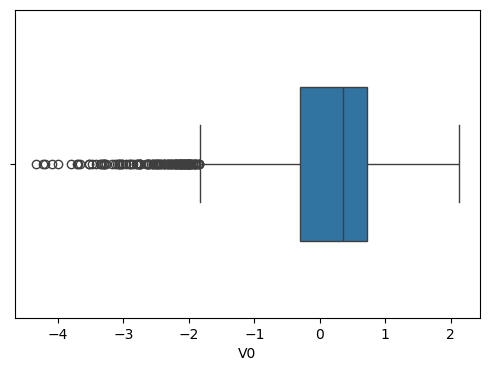

In [6]:
fig = plt.figure(figsize=(6, 4)) # 创建一个新的 figure 对象 (画布)，并设置 figure 的大小为宽度 6 英寸，高度 4 英寸。 figsize 控制绘图的整体尺寸。
sns.boxplot(x=train_data['V0'], orient="v", width=0.5) # 使用 seaborn 的 boxplot 函数绘制箱线图。
                                                        # x=train_data['V0']:  指定要绘制箱线图的数据是 train_data DataFrame 中 'V0' 列的数据。这列数据将作为箱线图的数值轴。
                                                        # orient="v":          指定箱线图的方向为垂直 (vertical)。如果设置为 "h"，则为水平方向。
                                                        # width=0.5:           设置箱线图的箱体宽度为 0.5。可以调整此值以控制箱体的粗细。
plt.show()

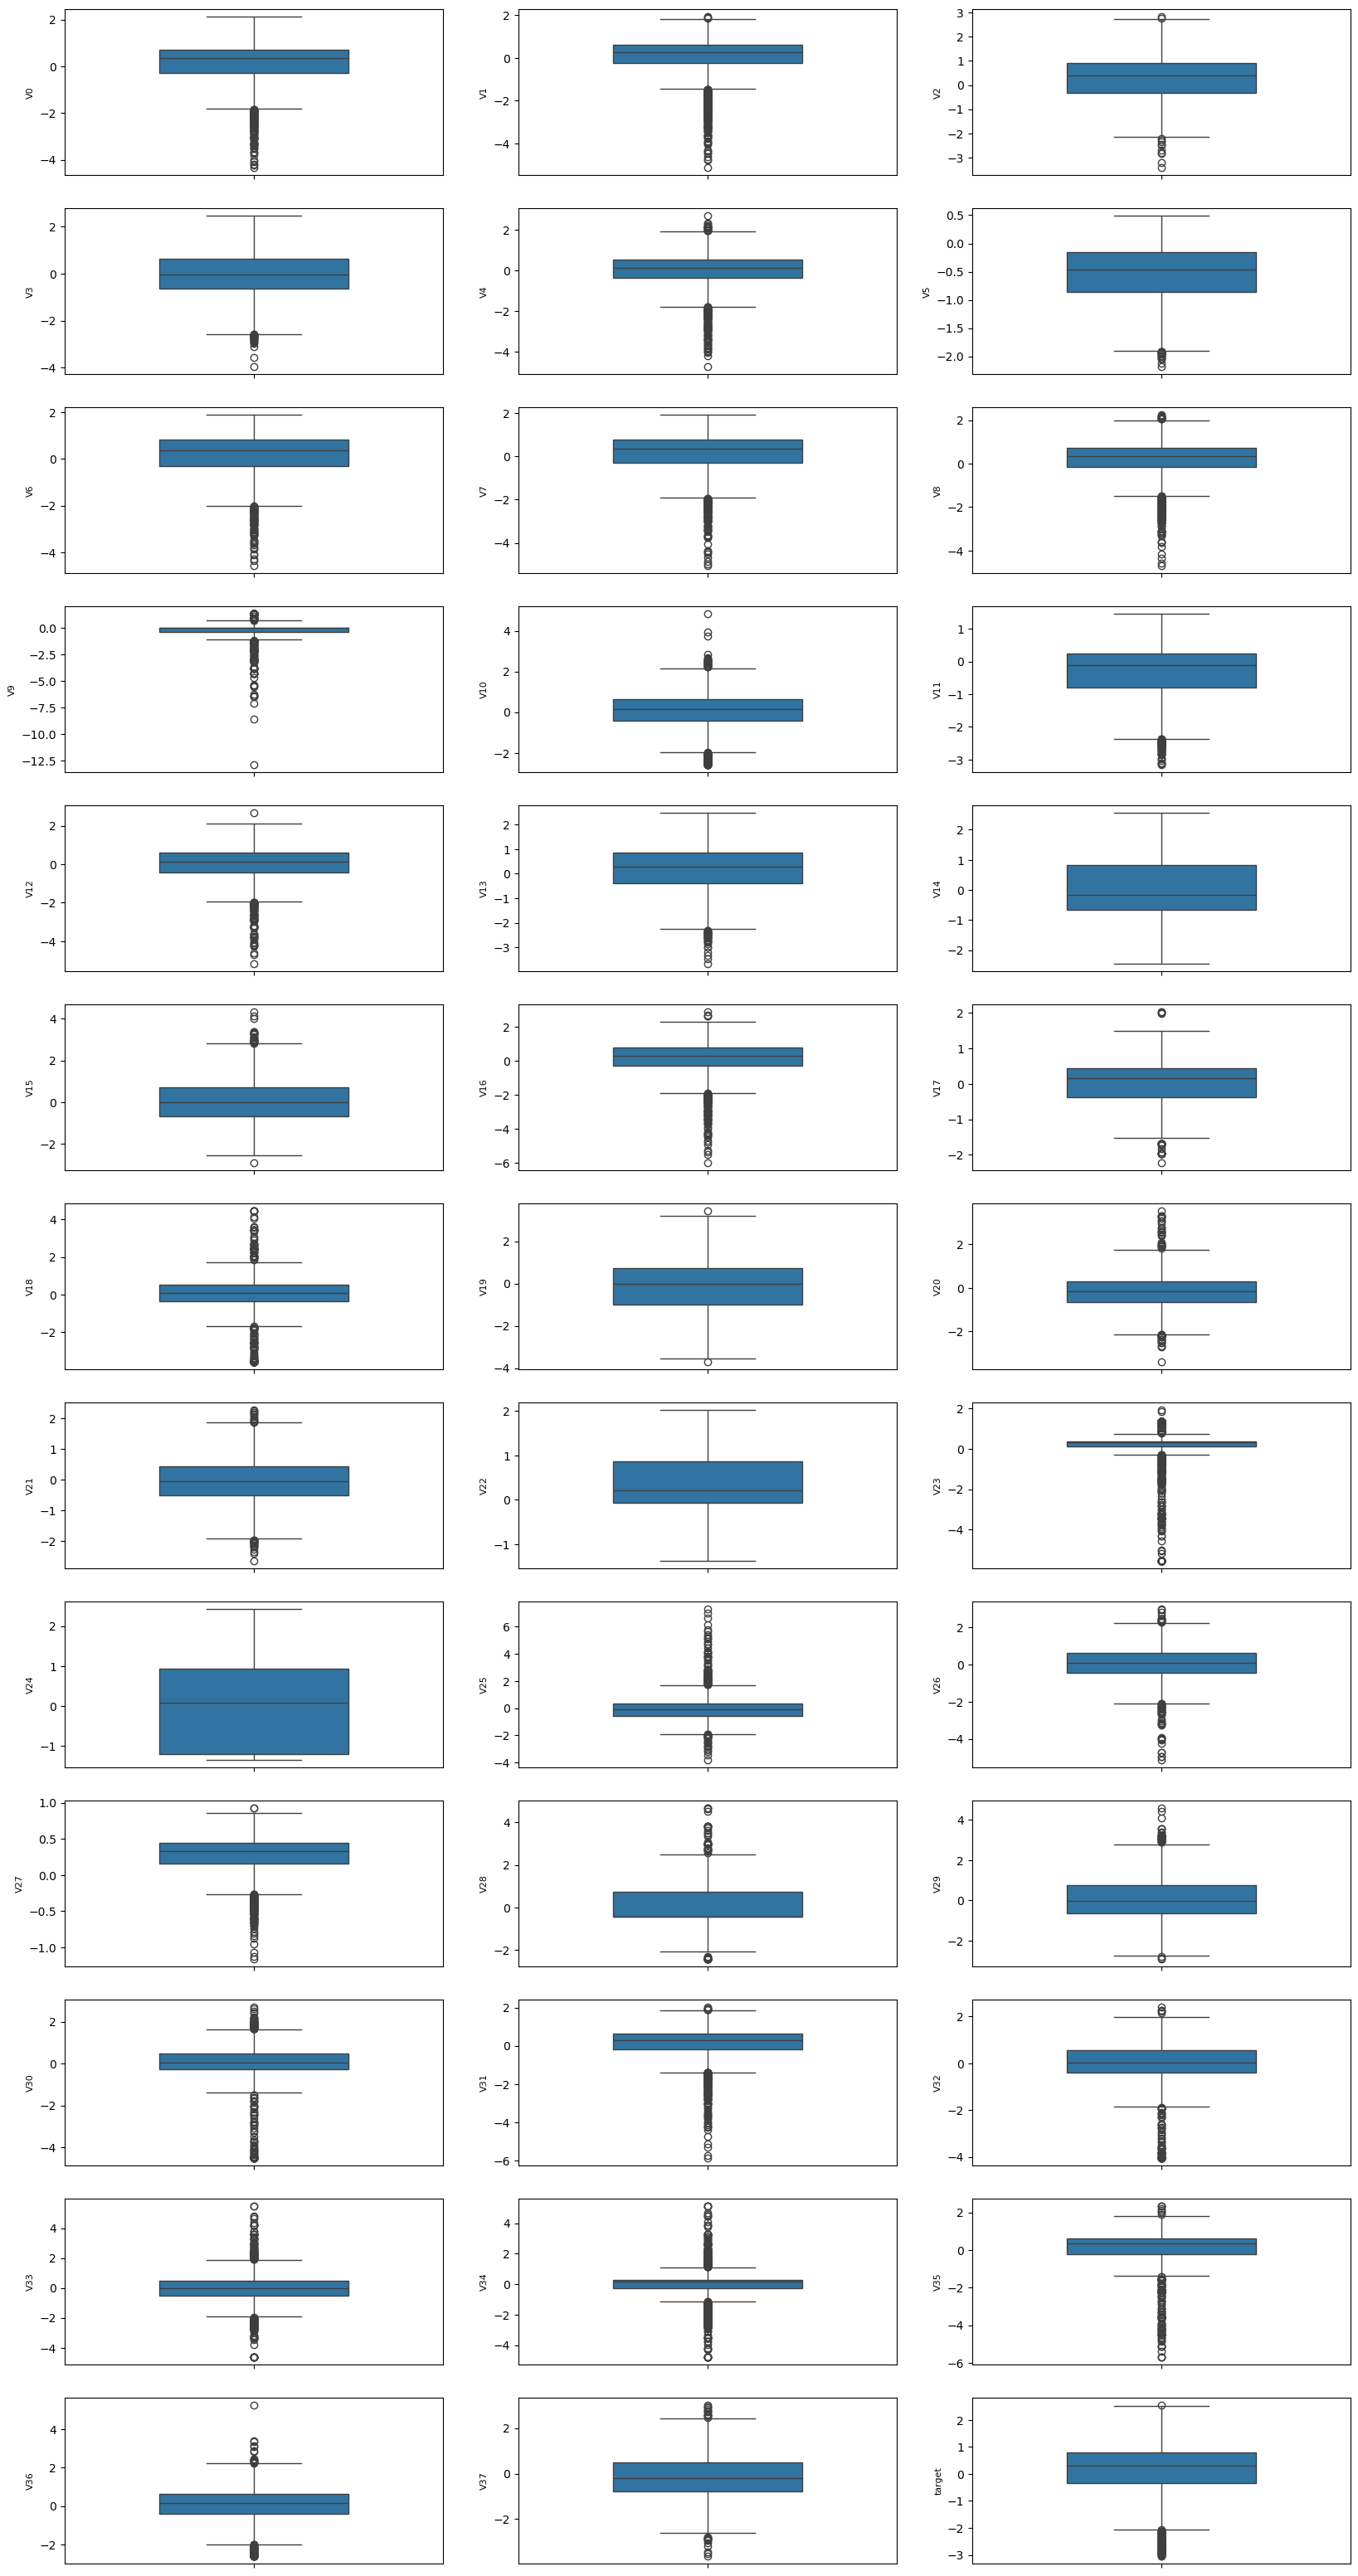

In [7]:

column = train_data.columns.tolist()[:39] # 获取 train_data 的所有列名，并转换为 Python 列表。然后取列表的前 39 个元素（索引 0 到 38），赋值给变量 column。
                                        # 这样做是为了选择前 39 列进行箱线图绘制 .
fig = plt.figure(figsize=(20, 40)) # 创建一个新的 figure 对象 (画布)，并设置 figure 的大小为宽度 20 英寸，高度 40 英寸。
                                   # figsize 设置较大的尺寸是为了容纳多个子图，防止子图之间重叠。
for i in range(39): # 使用 for 循环遍历前 39 个列的索引 (从 0 到 39)。
    plt.subplot(13, 3, i + 1) # 创建子图。
                                 # 13, 3:  将 figure 分割成 13 行 3 列的网格。总共可以创建 13 * 3 = 39 个子图。
                                 # i + 1:  指定当前子图的位置。子图的编号从 1 开始，按行优先从左到右递增。
                                 #          例如，i=0 时，创建的是第 1 个子图；i=1 时，创建的是第 2 个子图，以此类推。
    sns.boxplot(train_data[column[i]], orient="v", width=0.5) # 使用 seaborn 的 boxplot 函数绘制箱线图。
                                                              # train_data[column[i]]:  选取 train_data DataFrame 中 column 列表中索引为 i 的列。
                                                              #                           在循环的每次迭代中，column[i] 会依次取出 column 列表中的列名，
                                                              #                           从而绘制不同列的箱线图。
                                                              # orient="v":          指定箱线图的方向为垂直 (vertical)。
                                                              # width=0.5:           设置箱线图的箱体宽度为 0.5。
    plt.ylabel(column[i], fontsize=8) # 设置当前子图的 y 轴标签。
                                       # column[i]:  使用当前列名作为 y 轴标签。
                                       # fontsize=8:  设置 y 轴标签的字体大小为 8。这样做是为了在多个子图的情况下，标签不会显得过大而重叠。

In [8]:
# 